# Перцептрон
## Цель работы
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

## Содержание работы
1. Сгенерируйте данные и обучите на них модель перцептрона.
2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте данные и обучите на них модель перцептрона.

In [70]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

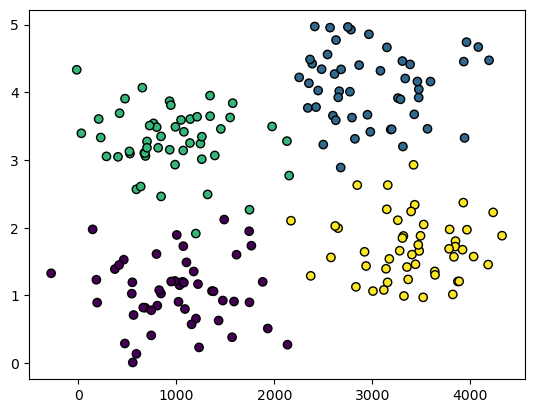

In [71]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [72]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

### 2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [75]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [76]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [77]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

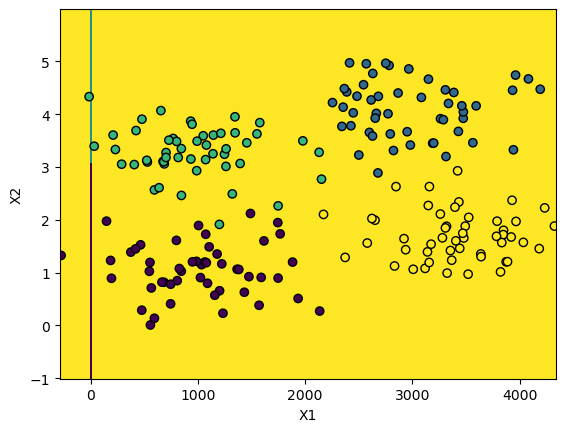

In [78]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Нормализуем данные в стандартные значения

In [79]:
from sklearn.preprocessing import StandardScaler 

In [80]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [81]:
X_scaled = scaler.transform(X)

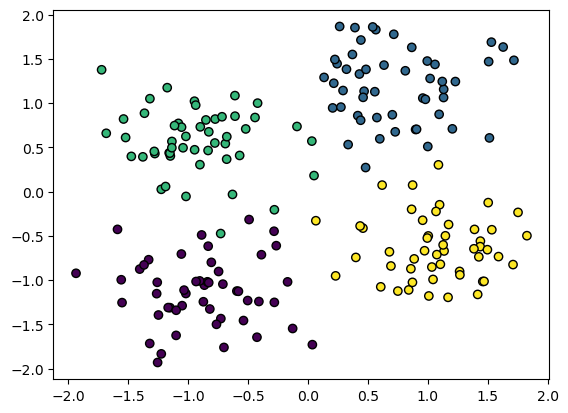

In [82]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [83]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

/Users/egorprozorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

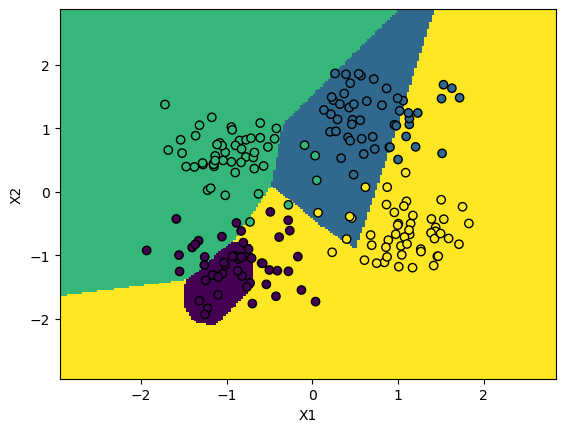

In [85]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [86]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.79664631
Iteration 2, loss = 1.79140886
Iteration 3, loss = 1.78620836
Iteration 4, loss = 1.78104235
Iteration 5, loss = 1.77590947
Iteration 6, loss = 1.77080941
Iteration 7, loss = 1.76574205
Iteration 8, loss = 1.76070730
Iteration 9, loss = 1.75570526
Iteration 10, loss = 1.75073612
Iteration 11, loss = 1.74580231
Iteration 12, loss = 1.74090084
Iteration 13, loss = 1.73603160
Iteration 14, loss = 1.73119597
Iteration 15, loss = 1.72639412
Iteration 16, loss = 1.72162617
Iteration 17, loss = 1.71689223
Iteration 18, loss = 1.71219238
Iteration 19, loss = 1.70752665
Iteration 20, loss = 1.70289386
Iteration 21, loss = 1.69829552
Iteration 22, loss = 1.69373217
Iteration 23, loss = 1.68920277
Iteration 24, loss = 1.68470721
Iteration 25, loss = 1.68024513
Iteration 26, loss = 1.67581446
Iteration 27, loss = 1.67141260
Iteration 28, loss = 1.66704327
Iteration 29, loss = 1.66270710
Iteration 30, loss = 1.65840306
Iteration 31, loss = 1.65413089
Iteration 32, los

In [87]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 2,  3, 45,  0],
       [ 0,  0,  0, 50]])

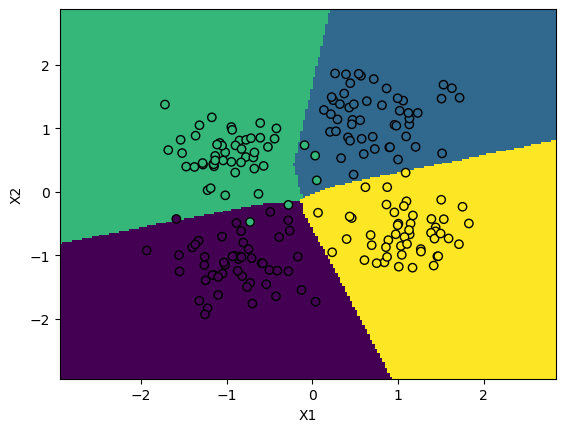

In [88]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10_000).fit(X_scaled, y)

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

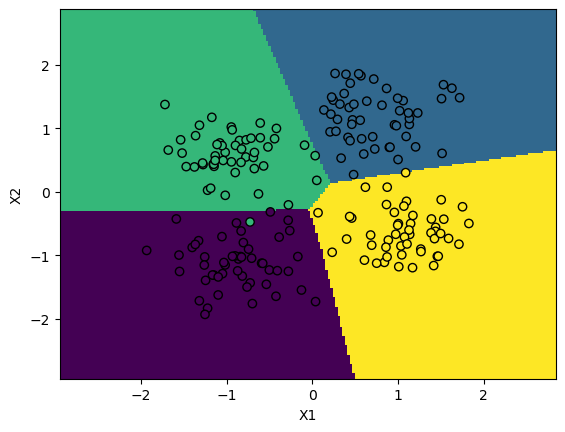

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задания для самостоятельного выполнения

### 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

#### Перцептрон с 1им нейроном

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.62118740
Iteration 2, loss = 1.61987127
Iteration 3, loss = 1.61855895
Iteration 4, loss = 1.61725048
Iteration 5, loss = 1.61594593
Iteration 6, loss = 1.61464536
Iteration 7, loss = 1.61334881
Iteration 8, loss = 1.61205815
Iteration 9, loss = 1.61077850
Iteration 10, loss = 1.60950330
Iteration 11, loss = 1.60823251
Iteration 12, loss = 1.60696614
Iteration 13, loss = 1.60570416
Iteration 14, loss = 1.60444660
Iteration 15, loss = 1.60319347
Iteration 16, loss = 1.60194478
Iteration 17, loss = 1.60070055
Iteration 18, loss = 1.59946395
Iteration 19, loss = 1.59824181
Iteration 20, loss = 1.59702660
Iteration 21, loss = 1.59581658
Iteration 22, loss = 1.59461165
Iteration 23, loss = 1.59341199
Iteration 24, loss = 1.59222639
Iteration 25, loss = 1.59105104
Iteration 26, loss = 1.58988119
Iteration 27, loss = 1.58871668
Iteration 28, loss = 1.58756105
Iteration 29, loss = 1.58641296
Iteration 30, loss = 1.58527023
Iteration 31, loss = 1.58413275
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

In [ ]:
clf.score(X_scaled, y)

0.25

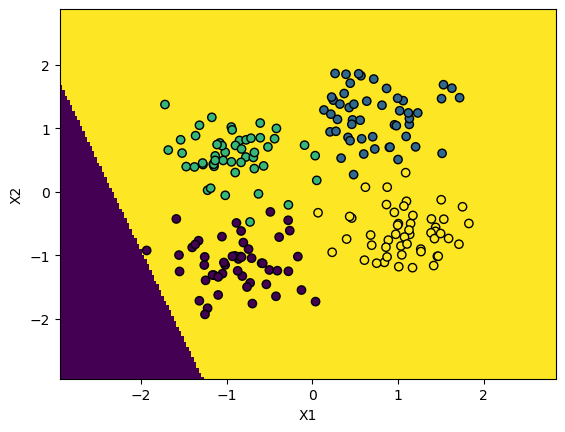

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон с 2мя нейронами

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.95567446
Iteration 2, loss = 1.95281905
Iteration 3, loss = 1.94997288
Iteration 4, loss = 1.94713609
Iteration 5, loss = 1.94430887
Iteration 6, loss = 1.94149135
Iteration 7, loss = 1.93868370
Iteration 8, loss = 1.93588607
Iteration 9, loss = 1.93309860
Iteration 10, loss = 1.93032142
Iteration 11, loss = 1.92755468
Iteration 12, loss = 1.92479851
Iteration 13, loss = 1.92205301
Iteration 14, loss = 1.91931832
Iteration 15, loss = 1.91659454
Iteration 16, loss = 1.91389532
Iteration 17, loss = 1.91121663
Iteration 18, loss = 1.90855010
Iteration 19, loss = 1.90589565
Iteration 20, loss = 1.90325320
Iteration 21, loss = 1.90062271
Iteration 22, loss = 1.89800412
Iteration 23, loss = 1.89539742
Iteration 24, loss = 1.89280258
Iteration 25, loss = 1.89021956
Iteration 26, loss = 1.88765000
Iteration 27, loss = 1.88510586
Iteration 28, loss = 1.88258119
Iteration 29, loss = 1.88007511
Iteration 30, loss = 1.87758195
Iteration 31, loss = 1.87510151
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[43,  0,  7,  0],
       [ 0, 49,  0,  1],
       [32,  3, 14,  1],
       [ 0,  1,  0, 49]])

In [ ]:
clf.score(X_scaled, y)

0.775

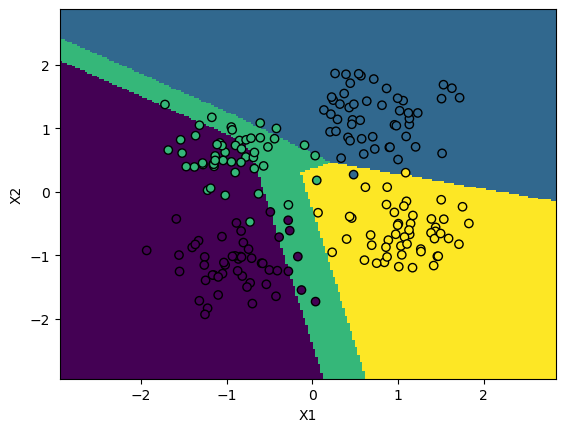

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон со 100 нейронами

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.36558893
Iteration 2, loss = 1.34904589
Iteration 3, loss = 1.33266062
Iteration 4, loss = 1.31643117
Iteration 5, loss = 1.30036871
Iteration 6, loss = 1.28446762
Iteration 7, loss = 1.26872049
Iteration 8, loss = 1.25313320
Iteration 9, loss = 1.23770209
Iteration 10, loss = 1.22242301
Iteration 11, loss = 1.20728970
Iteration 12, loss = 1.19229766
Iteration 13, loss = 1.17746097
Iteration 14, loss = 1.16277075
Iteration 15, loss = 1.14820619
Iteration 16, loss = 1.13377081
Iteration 17, loss = 1.11947178
Iteration 18, loss = 1.10529132
Iteration 19, loss = 1.09124237
Iteration 20, loss = 1.07731699
Iteration 21, loss = 1.06351364
Iteration 22, loss = 1.04983566
Iteration 23, loss = 1.03627704
Iteration 24, loss = 1.02283516
Iteration 25, loss = 1.00951235
Iteration 26, loss = 0.99631965
Iteration 27, loss = 0.98325133
Iteration 28, loss = 0.97029923
Iteration 29, loss = 0.95746577
Iteration 30, loss = 0.94475736
Iteration 31, loss = 0.93216694
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [ ]:
clf.score(X_scaled, y)

0.995

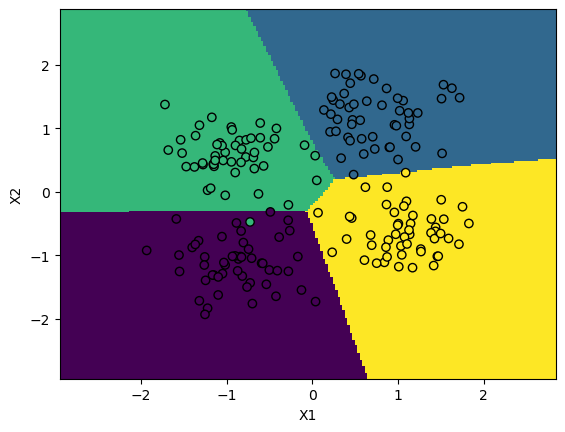

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

#### 2 СКРЫТЫХ СЛОЯ

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.32604316
Iteration 2, loss = 1.32167106
Iteration 3, loss = 1.31729888
Iteration 4, loss = 1.31292772
Iteration 5, loss = 1.30856659
Iteration 6, loss = 1.30414518
Iteration 7, loss = 1.29972536
Iteration 8, loss = 1.29531332
Iteration 9, loss = 1.29089862
Iteration 10, loss = 1.28649346
Iteration 11, loss = 1.28207623
Iteration 12, loss = 1.27765488
Iteration 13, loss = 1.27323385
Iteration 14, loss = 1.26879042
Iteration 15, loss = 1.26435896
Iteration 16, loss = 1.25992977
Iteration 17, loss = 1.25544424
Iteration 18, loss = 1.25089950
Iteration 19, loss = 1.24634302
Iteration 20, loss = 1.24174843
Iteration 21, loss = 1.23710055
Iteration 22, loss = 1.23243575
Iteration 23, loss = 1.22773239
Iteration 24, loss = 1.22299176
Iteration 25, loss = 1.21821140
Iteration 26, loss = 1.21339117
Iteration 27, loss = 1.20855964
Iteration 28, loss = 1.20371122
Iteration 29, loss = 1.19885107
Iteration 30, loss = 1.19397927
Iteration 31, loss = 1.18910747
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [ ]:
clf.score(X_scaled, y)

0.995

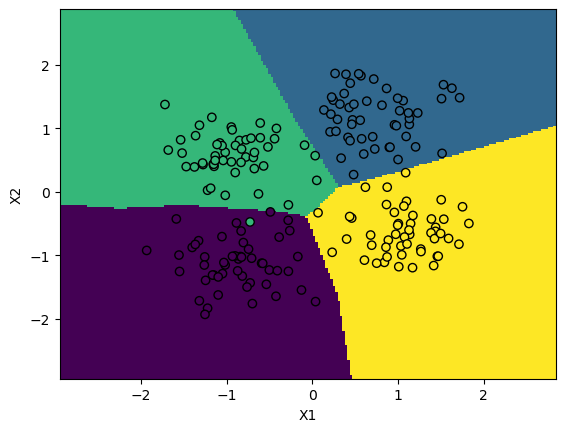

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 3 СКРЫТЫХ СЛОЯ

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.37586928
Iteration 2, loss = 1.37100137
Iteration 3, loss = 1.36618240
Iteration 4, loss = 1.36140478
Iteration 5, loss = 1.35665689
Iteration 6, loss = 1.35194596
Iteration 7, loss = 1.34726146
Iteration 8, loss = 1.34262159
Iteration 9, loss = 1.33804372
Iteration 10, loss = 1.33347804
Iteration 11, loss = 1.32892634
Iteration 12, loss = 1.32441832
Iteration 13, loss = 1.31991414
Iteration 14, loss = 1.31541839
Iteration 15, loss = 1.31088761
Iteration 16, loss = 1.30635684
Iteration 17, loss = 1.30184859
Iteration 18, loss = 1.29736613
Iteration 19, loss = 1.29289315
Iteration 20, loss = 1.28843128
Iteration 21, loss = 1.28398273
Iteration 22, loss = 1.27949153
Iteration 23, loss = 1.27497203
Iteration 24, loss = 1.27046575
Iteration 25, loss = 1.26597753
Iteration 26, loss = 1.26150722
Iteration 27, loss = 1.25704912
Iteration 28, loss = 1.25257566
Iteration 29, loss = 1.24813023
Iteration 30, loss = 1.24369863
Iteration 31, loss = 1.23926944
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  1, 48,  0],
       [ 0,  0,  0, 50]])

In [ ]:
clf.score(X_scaled, y)

0.99

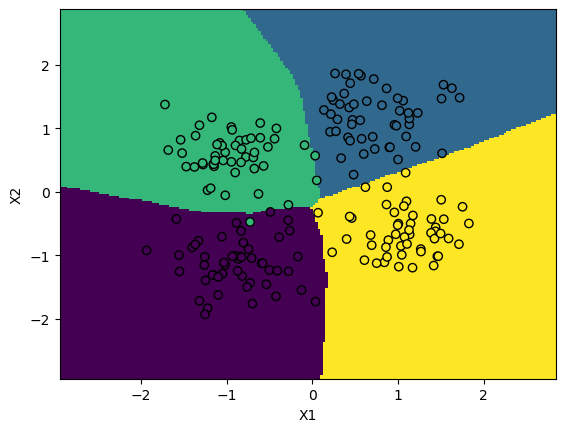

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 10 СКРЫТЫХ СЛОЯ

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.49363939
Iteration 2, loss = 1.49115096
Iteration 3, loss = 1.48881319
Iteration 4, loss = 1.48656992
Iteration 5, loss = 1.48450722
Iteration 6, loss = 1.48249776
Iteration 7, loss = 1.48049495
Iteration 8, loss = 1.47869981
Iteration 9, loss = 1.47696445
Iteration 10, loss = 1.47521739
Iteration 11, loss = 1.47339514
Iteration 12, loss = 1.47151055
Iteration 13, loss = 1.46961410
Iteration 14, loss = 1.46769305
Iteration 15, loss = 1.46579624
Iteration 16, loss = 1.46389811
Iteration 17, loss = 1.46198861
Iteration 18, loss = 1.46006061
Iteration 19, loss = 1.45811536
Iteration 20, loss = 1.45613927
Iteration 21, loss = 1.45411691
Iteration 22, loss = 1.45204470
Iteration 23, loss = 1.44993438
Iteration 24, loss = 1.44779127
Iteration 25, loss = 1.44558035
Iteration 26, loss = 1.44332267
Iteration 27, loss = 1.44106261
Iteration 28, loss = 1.43875934
Iteration 29, loss = 1.43642772
Iteration 30, loss = 1.43400600
Iteration 31, loss = 1.43153193
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [ ]:
clf.score(X_scaled, y)

0.995

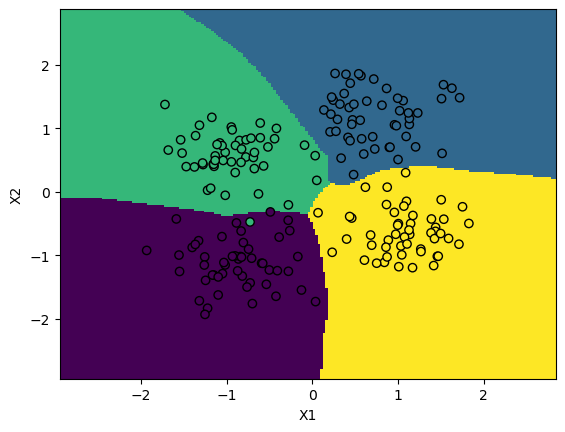

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.55873370
Iteration 2, loss = 1.55186168
Iteration 3, loss = 1.54501976
Iteration 4, loss = 1.53824727
Iteration 5, loss = 1.53150862
Iteration 6, loss = 1.52486462
Iteration 7, loss = 1.51835234
Iteration 8, loss = 1.51189537
Iteration 9, loss = 1.50548770
Iteration 10, loss = 1.49911408
Iteration 11, loss = 1.49282274
Iteration 12, loss = 1.48658311
Iteration 13, loss = 1.48048783
Iteration 14, loss = 1.47442197
Iteration 15, loss = 1.46847008
Iteration 16, loss = 1.46255932
Iteration 17, loss = 1.45663505
Iteration 18, loss = 1.45079639
Iteration 19, loss = 1.44499335
Iteration 20, loss = 1.43919813
Iteration 21, loss = 1.43337916
Iteration 22, loss = 1.42764289
Iteration 23, loss = 1.42198230
Iteration 24, loss = 1.41639732
Iteration 25, loss = 1.41082096
Iteration 26, loss = 1.40525180
Iteration 27, loss = 1.39966389
Iteration 28, loss = 1.39408859
Iteration 29, loss = 1.38856739
Iteration 30, loss = 1.38306997
Iteration 31, loss = 1.37759595
Iteration 32, los

In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [0.42992417 0.37288021], 
0 1 [-0.78913141  0.59996903], 
0 2 [0.23373817 0.73482231], 
0 3 [ 0.87381173 -0.7059568 ], 
0 4 [-1.02829636  0.01398063], 
0 5 [-0.30412434  0.85056296], 
0 6 [-0.8520363  -0.25892811], 
0 7 [-0.14233225 -0.44669823], 
0 8 [0.79301519 0.35486741], 
0 9 [0.2796239  0.48915221], 

1 0 [ 0.41747987 -0.20371662  0.68496517 -0.36915927  0.87236626  0.01658531
  0.53184628  0.125621   -0.55277776 -0.45156124], 
1 1 [-0.04584101 -0.39485792 -0.5479126  -0.37709902 -0.00324258  0.22946546
 -0.41364363 -0.06699027  0.38706884 -0.14683179], 
1 2 [ 0.76469922 -0.09323664  0.43007923 -0.2535559  -0.70320236  0.19441594
 -0.15111937  0.1819902   0.91763866  0.00257854], 
1 3 [-0.2778198  -0.0035589  -0.16383569  0.52310276  0.40427437 -0.92223847
  0.83455612  0.70419642  0.47378109 -0.0176129 ], 
1 4 [-0.10616434  0.81700971 -0.45968438  0.73790046  0.09417381  0.43497248
  0.35042961 -0.35728473  0.78345753  0.00276668], 
1 5 [ 1.59408783e-01  3.33065587e-01 -2.05

In [ ]:
for i in range(len(clf.intercepts_)):
    print(clf.intercepts_[i])

[ 0.25423316 -0.10702717  0.18774929  0.13804875  0.49154629  0.52057649
  1.10911417  0.83570441  0.91107065 -0.59008142]
[ 0.48806163 -0.32202658  0.27465949 -0.10789831  0.67579969 -0.17268922
 -0.12977078  0.00674324  0.09795049 -0.4079915 ]
[ 0.73432619  0.95771378 -0.1898583   0.14777665  0.56405345 -0.11566754
 -0.02719235  0.54229027 -0.41783026 -0.16622802]
[-0.19971519 -0.26686909 -0.17834004 -0.04813418]


### 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [ ]:
import time

In [ ]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.16800983
Iteration 2, loss = 1.16331577
Iteration 3, loss = 1.15863873
Iteration 4, loss = 1.15398080
Iteration 5, loss = 1.14933784
Iteration 6, loss = 1.14469801
Iteration 7, loss = 1.14006836
Iteration 8, loss = 1.13545246
Iteration 9, loss = 1.13085613
Iteration 10, loss = 1.12627808
Iteration 11, loss = 1.12171568
Iteration 12, loss = 1.11717127
Iteration 13, loss = 1.11264610
Iteration 14, loss = 1.10813472
Iteration 15, loss = 1.10364314
Iteration 16, loss = 1.09916864
Iteration 17, loss = 1.09470827
Iteration 18, loss = 1.09026900
Iteration 19, loss = 1.08584910
Iteration 20, loss = 1.08144835
Iteration 21, loss = 1.07706691
Iteration 22, loss = 1.07270490
Iteration 23, loss = 1.06836583
Iteration 24, loss = 1.06404751
Iteration 25, loss = 1.05974863
Iteration 26, loss = 1.05546903
Iteration 27, loss = 1.05120822
Iteration 28, loss = 1.04696627
Iteration 29, loss = 1.04274296
Iteration 30, loss = 1.03853541
Iteration 31, loss = 1.03433684
Iteration 32, los

In [ ]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.39995646
Iteration 2, loss = 1.38083160
Iteration 3, loss = 1.36580603
Iteration 4, loss = 1.35202797
Iteration 5, loss = 1.33640865
Iteration 6, loss = 1.31845167
Iteration 7, loss = 1.29690677
Iteration 8, loss = 1.27130029
Iteration 9, loss = 1.24121222
Iteration 10, loss = 1.20517230
Iteration 11, loss = 1.16286957
Iteration 12, loss = 1.11454324
Iteration 13, loss = 1.06186144
Iteration 14, loss = 1.00449175
Iteration 15, loss = 0.94146840
Iteration 16, loss = 0.87253954
Iteration 17, loss = 0.79639927
Iteration 18, loss = 0.71642445
Iteration 19, loss = 0.63749023
Iteration 20, loss = 0.56250346
Iteration 21, loss = 0.49148516
Iteration 22, loss = 0.42330130
Iteration 23, loss = 0.35653386
Iteration 24, loss = 0.29062710
Iteration 25, loss = 0.22753487
Iteration 26, loss = 0.17067441
Iteration 27, loss = 0.12362316
Iteration 28, loss = 0.08772739
Iteration 29, loss = 0.06304214
Iteration 30, loss = 0.04764876
Iteration 31, loss = 0.03883088
Iteration 32, los

### 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
X_scaled_iris = scaler.fit_transform(X)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled_iris, y)

Iteration 1, loss = 1.27348634
Iteration 2, loss = 1.26684185
Iteration 3, loss = 1.26030460
Iteration 4, loss = 1.25389537
Iteration 5, loss = 1.24759963
Iteration 6, loss = 1.24135484
Iteration 7, loss = 1.23521356
Iteration 8, loss = 1.22915849
Iteration 9, loss = 1.22316785
Iteration 10, loss = 1.21723601
Iteration 11, loss = 1.21132917
Iteration 12, loss = 1.20545399
Iteration 13, loss = 1.19962187
Iteration 14, loss = 1.19382632
Iteration 15, loss = 1.18806790
Iteration 16, loss = 1.18239267
Iteration 17, loss = 1.17672961
Iteration 18, loss = 1.17104523
Iteration 19, loss = 1.16530263
Iteration 20, loss = 1.15950381
Iteration 21, loss = 1.15369194
Iteration 22, loss = 1.14787638
Iteration 23, loss = 1.14206512
Iteration 24, loss = 1.13623984
Iteration 25, loss = 1.13036794
Iteration 26, loss = 1.12450626
Iteration 27, loss = 1.11875968
Iteration 28, loss = 1.11305529
Iteration 29, loss = 1.10739456
Iteration 30, loss = 1.10173637
Iteration 31, loss = 1.09603958
Iteration 32, los

In [ ]:
confusion_matrix(y, clf.predict(X_scaled_iris))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

### 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabets = load_diabetes()

In [ ]:
features = diabets.data

In [ ]:
data = pd.DataFrame(features, columns = diabets.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
X_diabetes, y_diabetes = diabets.data, diabets.target

In [ ]:
X_diabetes.shape

(442, 10)

In [ ]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=10_000, verbose=True).fit(X_diabetes_scaled, y_diabetes)

Iteration 1, loss = 5.37929252
Iteration 2, loss = 5.37280416
Iteration 3, loss = 5.36754774
Iteration 4, loss = 5.36257030
Iteration 5, loss = 5.35759931
Iteration 6, loss = 5.35287145
Iteration 7, loss = 5.34788828
Iteration 8, loss = 5.34313212
Iteration 9, loss = 5.33822819
Iteration 10, loss = 5.33350085
Iteration 11, loss = 5.32851364
Iteration 12, loss = 5.32353684
Iteration 13, loss = 5.31848027
Iteration 14, loss = 5.31309509
Iteration 15, loss = 5.30787659
Iteration 16, loss = 5.30232706
Iteration 17, loss = 5.29664161
Iteration 18, loss = 5.29054112
Iteration 19, loss = 5.28438456
Iteration 20, loss = 5.27772989
Iteration 21, loss = 5.27104252
Iteration 22, loss = 5.26364195
Iteration 23, loss = 5.25607469
Iteration 24, loss = 5.24795759
Iteration 25, loss = 5.23961217
Iteration 26, loss = 5.23098377
Iteration 27, loss = 5.22193626
Iteration 28, loss = 5.21276098
Iteration 29, loss = 5.20301410
Iteration 30, loss = 5.19309230
Iteration 31, loss = 5.18285960
Iteration 32, los

In [ ]:
confusion_matrix(y_diabetes, clf.predict(X_diabetes_scaled))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
clf.score(X_diabetes_scaled, y_diabetes)

0.9027149321266968

**1. Что называют глубокой нейронной сетью?**  
Глубокой нейронной сетью называют сеть с несколькими скрытыми слоями между входом и выходом. Эти сети могут эффективно извлекать сложные иерархические признаки из данных, что позволяет решать задачи, требующие высокоуровневых представлений, такие как распознавание образов, обработка текста и другие сложные задачи.

**2. Что такое архитектура нейронной сети?**  
Архитектура нейронной сети — это структура сети, включающая в себя количество слоев, типы слоев (например, полносвязные, сверточные, рекуррентные и т. д.), количество нейронов в каждом слое, а также способы подключения между слоями. Архитектура определяет, как информация проходит через нейронную сеть и как она будет обрабатываться.

**3. Как количество нейронов и слоев влияет на качество моделирования?**  
- Увеличение количества слоев (глубина сети) позволяет модели захватывать более сложные зависимости в данных, что улучшает её способность моделировать сложные задачи. Однако, это также может привести к переобучению, если модель слишком сложна для данных.
- Увеличение количества нейронов в слое позволяет более детально обрабатывать информацию, но также увеличивает вычислительные затраты и может привести к переобучению.
Оптимальное количество нейронов и слоев зависит от сложности задачи и объема данных.

**4. Как нейронная сеть решает задачи множественной классификации?**  
Для решения задачи множественной классификации нейронная сеть может использовать один из подходов:
- **One-vs-Rest (OvR):** для каждого класса строится отдельный классификатор, который решает, принадлежит ли объект этому классу или нет.
- **Softmax:** используется на выходном слое для получения вероятностей принадлежности к каждому из классов. Модель выбирает класс с максимальной вероятностью как предсказанный результат.

**5. В каких случаях следует применять перцептрон?**  
Перцептрон следует применять, когда задача состоит в том, чтобы разделить данные на два класса, и они линейно разделимы. Это базовая модель для бинарной классификации, которая работает хорошо для простых задач, таких как распознавание элементов, которые могут быть отделены одной прямой (или гиперплоскостью в многомерном пространстве).